In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
import scipy.io as sio
import os

batch_size = 32
input_shape = (240,240)
train_dir = 'G:\\Data\\stanford-car-dataset-by-classes-folder\\car_data\\train'
test_dir = 'G:\\Data\\stanford-car-dataset-by-classes-folder\\car_data\\test'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,  
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


validation_generator=test_datagen.flow_from_directory(test_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [3]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
from keras import Model
import efficientnet.keras as efn

base_model = efn.EfficientNetB1(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Using TensorFlow backend.


Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 3 0           stem_bn[0][0]                    
____

Epoch 1/10
255/255 [==============================] - 88s 344ms/step - loss: 4.7035 - acc: 0.0917 - val_loss: 3.7914 - val_acc: 0.2206
Epoch 2/10
255/255 [==============================] - 71s 278ms/step - loss: 2.9607 - acc: 0.3778 - val_loss: 2.5408 - val_acc: 0.4217
Epoch 3/10
255/255 [==============================] - 69s 271ms/step - loss: 1.9038 - acc: 0.5776 - val_loss: 1.9233 - val_acc: 0.5421
Epoch 4/10
255/255 [==============================] - 69s 271ms/step - loss: 1.3421 - acc: 0.6915 - val_loss: 1.5960 - val_acc: 0.5976
Epoch 5/10
255/255 [==============================] - 69s 271ms/step - loss: 1.0291 - acc: 0.7636 - val_loss: 1.3962 - val_acc: 0.6472
Epoch 6/10
255/255 [==============================] - 69s 271ms/step - loss: 0.8141 - acc: 0.8094 - val_loss: 1.3153 - val_acc: 0.6560
Epoch 7/10
255/255 [==============================] - 69s 271ms/step - loss: 0.6512 - acc: 0.8506 - val_loss: 1.1762 - val_acc: 0.6897
Epoch 8/10
255/255 [==============================] - 6

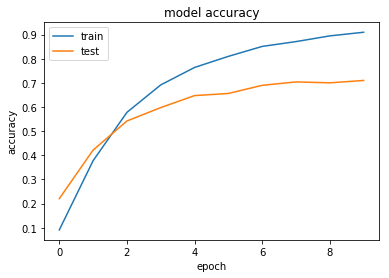

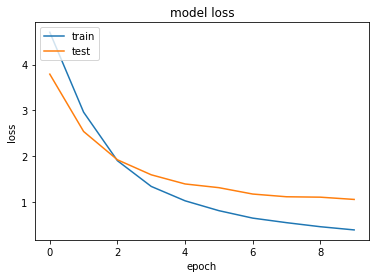

In [4]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size + 1,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size + 1,
                    epochs=10,                           
                    workers=8,             
                    max_queue_size=32,             
                    verbose=1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
batch_size = 32
train_generator=train_datagen.flow_from_directory(train_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


validation_generator=test_datagen.flow_from_directory(test_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


for layer in model.layers:
    layer.trainable = True
    
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 3 0           stem_bn[0][0]                    
_____________________

Epoch 1/20
255/255 [==============================] - 111s 435ms/step - loss: 0.2996 - acc: 0.9336 - val_loss: 0.9811 - val_acc: 0.7335
Epoch 2/20
255/255 [==============================] - 97s 382ms/step - loss: 0.2450 - acc: 0.9533 - val_loss: 0.9311 - val_acc: 0.7458
Epoch 3/20
255/255 [==============================] - 97s 382ms/step - loss: 0.2064 - acc: 0.9629 - val_loss: 0.8856 - val_acc: 0.7574
Epoch 4/20
255/255 [==============================] - 101s 396ms/step - loss: 0.1863 - acc: 0.9683 - val_loss: 0.8631 - val_acc: 0.7646
Epoch 5/20
255/255 [==============================] - 98s 386ms/step - loss: 0.1675 - acc: 0.9730 - val_loss: 0.8381 - val_acc: 0.7671
Epoch 6/20
255/255 [==============================] - 97s 379ms/step - loss: 0.1544 - acc: 0.9749 - val_loss: 0.8306 - val_acc: 0.7728
Epoch 7/20
255/255 [==============================] - 96s 378ms/step - loss: 0.1406 - acc: 0.9762 - val_loss: 0.8131 - val_acc: 0.7755
Epoch 8/20
255/255 [==============================] -

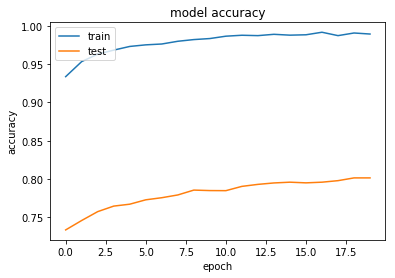

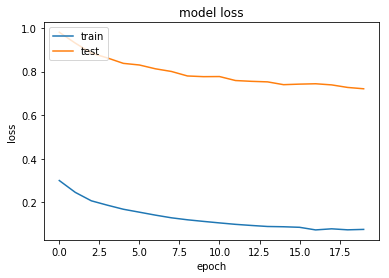

In [6]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size + 1 ,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size + 1,
                    epochs=20,                           
                    workers=8,             
                    max_queue_size=32,             
                    verbose=1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()